<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boston-Housing-Prices-Regression-Modeling-with-Keras" data-toc-modified-id="Boston-Housing-Prices-Regression-Modeling-with-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston Housing Prices Regression Modeling with Keras</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inspect and visualize the data</a></span></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Build-model-function" data-toc-modified-id="Build-model-function-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Build model function</a></span></li><li><span><a href="#Initial-pass" data-toc-modified-id="Initial-pass-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Initial pass</a></span></li><li><span><a href="#Grid-search-hyperparameter-tuning" data-toc-modified-id="Grid-search-hyperparameter-tuning-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Grid search hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Alter-tuneModel-for-RandomizedSearchCV-support" data-toc-modified-id="Alter-tuneModel-for-RandomizedSearchCV-support-6.2.3.1"><span class="toc-item-num">6.2.3.1&nbsp;&nbsp;</span>Alter tuneModel for RandomizedSearchCV support</a></span></li><li><span><a href="#RandomizedSearchCV-hyperparameter-search" data-toc-modified-id="RandomizedSearchCV-hyperparameter-search-6.2.3.2"><span class="toc-item-num">6.2.3.2&nbsp;&nbsp;</span>RandomizedSearchCV hyperparameter search</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-6.2.3.3"><span class="toc-item-num">6.2.3.3&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#Tune-network-topology" data-toc-modified-id="Tune-network-topology-6.2.3.4"><span class="toc-item-num">6.2.3.4&nbsp;&nbsp;</span>Tune network topology</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-6.2.3.5"><span class="toc-item-num">6.2.3.5&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#Graph-final-model-performance" data-toc-modified-id="Graph-final-model-performance-6.2.3.6"><span class="toc-item-num">6.2.3.6&nbsp;&nbsp;</span>Graph final model performance</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final comments</a></span></li></ul></div>

<h1>Boston Housing Prices Regression Modeling with Keras</h1>

<img style="float: left; margin-right: 15px; width: 40%; height: 40%; " src="images/boston.jpg" />

# Purpose

The purpose of this write-up is to build upon the [first](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb) and [second](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) write-ups involving the Boston housing prices dataset.  

Goals include:
* Utilize RandomizedSearchCV for hyperparameter tuning
* Feature selection with SelectKBest
* Examine algorithm performance visually

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Load libraries and data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import os

#import multiprocessing

import numpy as np
from numpy import arange

from math import sqrt

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.callbacks import History

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataFile = os.path.join(".", "datasets", "housing.csv")
data = read_csv(dataFile, header = 0, delim_whitespace = True)

# Helper functions

In [4]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

In [5]:
def makeRange(start, stop, step = 1, multi = 1, dec = 1):
    vals = []
    for i in range(start, stop, step):
        vals.append(np.round(multi * i, decimals = dec))
        
    return vals

# Inspect and visualize the data

Please the [first Boston housing data's write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb#Inspect-and-visualize-the-data) details on this topic.

# Model the data

## Create validation data set

In [6]:
# Seperate X and Y values
x = data.values[:, 0:len(data.columns) - 1]
y = data.values[:, len(data.columns) - 1]

# Uncomment if you want a smaller subset that runs faster for testing
# x = data.values[1:50, 0:len(data.columns) - 1]
# y = data.values[1:50, len(data.columns) - 1]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (506, 13)
y.shape =  (506,)
--------
xTrain.shape =  (404, 13)
yTrain.shape =  (404,)
xVal.shape =  (102, 13)
yVal.shape =  (102,)


## Build models

### Build model function

More info on the `kernal_initializer`:  https://keras.io/initializers/

In [13]:
def wrapper(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None):
    
    def buildModel():
    
        opt = None

        model = Sequential()

        # kernel_initializer='normal' -> Initializer capable of adapting its scale to the shape of weights
        # bias_initializer -> 'zeros' (default per the docs) 
        model.add(Dense(20, kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(1, kernel_initializer='normal'))

        if optimizer.lower() == 'adam':
            opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
        else:
            # Please don't ever use eval where you're recieving input from non-trusted sources!
            # A Jupyter notebook is OK; a public facing service is certainly not
            opt = eval(optimizer)()

        model.compile(loss = 'mean_squared_error', optimizer = opt)

        return model   
    
    return buildModel

### Initial pass

For this first pass an educated guess is taken for what might work well on the dataset.  This provides an initial baseline, and then we can tune the hyperparameters to hopefully improve the model.

In [9]:
# Define vars and init
folds = 10
seed = 10

np.random.seed(seed)

model = KerasRegressor(build_fn = wrapper(), epochs = 200, batch_size = 5, verbose = 0)
kFold = KFold(n_splits = folds, random_state = seed)
results = cross_val_score(model, xTrain, yTrain, cv = kFold)

print("MSE: %.2f (%.2f)" % (results.mean(), results.std()))

MSE: -17.87 (7.24)


This is better then what the [previous](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb) write-up's models accomplished with no tuning as of yet:

<pre>
         Model    MSE  StdDev
3    scaledKNN -20.35   11.87
0     scaledLR -21.26    7.11
4   scaledCART -22.66    9.31
1  scaledLASSO -26.94   10.38
5    scaledSVR -28.52   13.98
2     scaledEN -28.60   11.65
</pre>

It does not; however, compare to the results achieved via the ensemble methods:

<pre>
       Model     MSE  StdDev
1  scaledGBM -9.700   5.342 
3  scaledET  -10.339  5.399 
2  scaledRF  -13.695  7.276 
0  scaledAB  -14.176  8.917
</pre>

### Grid search hyperparameter tuning

In a [previous write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) we utilized [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  We'd like to now examine [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

We observed in the last write-up that the `KerasRegressor` estimator utilizing the `Adam` optimizer give us good results.  We'll continue working with this combination.

#### Alter tuneModel for RandomizedSearchCV support 

We need to alter the `tuneModel` function to support `RandomizedSearchCV`.

In [10]:
def tuneModel(modelName, modelObj, params, iterations = 20, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10
    
    np.random.seed(featureSeed)
    
    # Use MSE since this is a regression problem
    score = 'neg_mean_squared_error'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'MSE', 'StdDev', 'Best Params'])

    # Create feature union (adding SelectKBest)
    features = []
    features.append(('Scaler', StandardScaler()))
    features.append(('SelectKBest', SelectKBest()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = RandomizedSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_distributions = params,
        n_iter = iterations,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed),
        random_state = featureSeed
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.cv_results_['std_test_score'][featureResults.best_index_],
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

#### RandomizedSearchCV hyperparameter search

OK, let's dig in and see what sort of parameter combinations `RandomizedSearchCV` might be able to find for us that provide good algorithm performance.  If we would have utilized `GridSearchCV` as in the [previous write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) we'd probably be here all week waiting for the combinations below to finish.  ;)

In [41]:
modelName = "housingModel"
modelObj =  KerasRegressor(build_fn = wrapper(), verbose = 0)
params = {
    'housingModel__optimizer' : ['Adam'],
    'housingModel__epochs' : makeRange(200, 600, 50),
    'housingModel__batch_size' : makeRange(4, 68, 4),
    'FeatureUnion__SelectKBest__k': makeRange(1, xTrain.shape[1]),
    'housingModel__lr' : makeRange(1, 9, 1, .001, 3),
    'housingModel__epsilon' : makeRange(2, 8, 1, .5, 1),
}

set1 = tuneModel(modelName, modelObj, params, 10, True, True)

,Model,MSE,StdDev,Best Params
0,housingModel,-12.923,10.544,"{'housingModel__optimizer': 'Adam', 'housingModel__lr': 0.005, 'housingModel__epsilon': 1.5, 'housingModel__epochs': 350, 'housingModel__batch_size': 36, 'FeatureUnion__SelectKBest__k': 2}"


In [42]:
set_option('precision', 3)
DataFrame(set1.cv_results_).sort_values(by=['mean_test_score', 'std_test_score'], ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_FeatureUnion__SelectKBest__k,param_housingModel__batch_size,param_housingModel__epochs,param_housingModel__epsilon,param_housingModel__lr,param_housingModel__optimizer,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,12.162,0.975,-12.923,-5.768,2,36,350,1.5,0.005,Adam,...,-39.856,-5.547,-9.200,-6.600,-25.413,-4.548,0.551,0.054,10.544,0.755
2,13.126,1.164,-13.062,-7.470,2,44,400,2.5,0.002,Adam,...,-33.158,-6.962,-6.769,-7.158,-29.250,-5.741,0.490,0.050,9.324,0.706
3,81.680,1.363,-14.276,-7.638,7,8,550,1.5,0.006,Adam,...,-30.706,-4.547,-6.938,-7.380,-31.150,-7.372,3.276,0.053,8.743,1.411
9,245.504,2.589,-14.861,-9.099,10,4,450,2,0.001,Adam,...,-24.559,-9.178,-12.357,-7.707,-21.949,-6.987,4.468,0.074,5.186,2.525
8,21.193,2.366,-15.473,-8.751,2,36,250,2.5,0.002,Adam,...,-43.321,-8.241,-8.194,-8.593,-30.608,-6.901,0.540,0.072,11.361,0.837
5,15.455,1.752,-15.506,-11.334,3,44,300,2,0.002,Adam,...,-30.041,-11.962,-9.391,-10.604,-28.895,-9.480,0.539,0.065,7.814,2.542
4,15.434,1.562,-15.764,-12.118,3,60,450,1,0.001,Adam,...,-23.848,-10.908,-8.697,-10.701,-28.050,-10.452,0.755,0.086,6.847,2.520
0,22.618,0.830,-16.429,-10.603,9,16,400,1,0.001,Adam,...,-37.575,-12.045,-9.254,-9.697,-36.836,-10.174,0.619,0.045,10.529,0.718
7,16.628,2.328,-17.656,-13.179,2,36,200,1.5,0.001,Adam,...,-31.712,-10.148,-9.390,-14.949,-43.857,-10.971,0.592,0.316,11.727,1.596
6,20.488,2.080,-18.634,-11.783,7,64,550,3.5,0.003,Adam,...,-36.326,-8.258,-11.253,-11.688,-42.961,-12.149,1.454,0.365,11.097,1.657


#### Comments

From the results above it's pretty clear we're likely at a point of diminishing returns for further tuning with this set of hyperparamter options. (I also tested a number of additional iterations outside of this notebook which further confirmed this conclusion.)

Likely the next logical step would be to experiment with the topology of the neural network itself such as adding additional layers and/or neurons, or we could simply disregard neural networks as an options for this problem and utilize one of the effective algorithms covered in previous write-ups. So let's do a few rounds of topology modification testing next, make a final model choice, examine some predictions, and then wrap up.

#### Tune network topology

We'll first build a function to return a deep neural network model:

In [32]:
def buildModelDeep(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None):
    opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
    model = Sequential()
    model.add(Dense(20, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(5, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    return model   

And another function to return a wide neural network model:

In [33]:
def buildModelWide(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None):
    opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
    model = Sequential()
    model.add(Dense(30, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    return model   

And one final tweak to the tuning function:

In [34]:
def tuneFinalModel(modelName, modelObj, params, iterations = 20, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10
    
    np.random.seed(featureSeed)
    
    # Use MSE since this is a regression problem
    score = 'neg_mean_squared_error'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'MSE', 'StdDev', 'Best Params'])

    # Create feature union (adding SelectKBest)
    features = []
    features.append(('Scaler', StandardScaler()))
    features.append(('SelectKBest', SelectKBest()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed),
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.cv_results_['std_test_score'][featureResults.best_index_],
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

##### Execute deep model

In [35]:
finalModelName = "housingModel"
finalModelObj =  KerasRegressor(build_fn = buildModelDeep, verbose = 0)
finalParams = {
    'housingModel__optimizer' : ['Adam'],
    'housingModel__epochs' : [350],
    'housingModel__batch_size' : [36],
    'FeatureUnion__SelectKBest__k': [2, 3],
    'housingModel__lr' : [0.005],
    'housingModel__epsilon' : [1.5],
}

final = tuneFinalModel(finalModelName, finalModelObj, finalParams, 2, True, True)

,Model,MSE,StdDev,Best Params
0,housingModel,-13.262929,9.448623,"{'FeatureUnion__SelectKBest__k': 2, 'housingModel__batch_size': 36, 'housingModel__epochs': 350, 'housingModel__epsilon': 1.5, 'housingModel__lr': 0.005, 'housingModel__optimizer': 'Adam'}"


##### Execute wide model

In [36]:
finalModelName = "housingModel"
finalModelObj =  KerasRegressor(build_fn = buildModelWide, verbose = 0)
finalParams = {
    'housingModel__optimizer' : ['Adam'],
    'housingModel__epochs' : [350],
    'housingModel__batch_size' : [36],
    'FeatureUnion__SelectKBest__k': [2, 3],
    'housingModel__lr' : [0.005],
    'housingModel__epsilon' : [1.5],
}

final = tuneFinalModel(finalModelName, finalModelObj, finalParams, 2, True, True)

,Model,MSE,StdDev,Best Params
0,housingModel,-13.167054,10.427444,"{'FeatureUnion__SelectKBest__k': 2, 'housingModel__batch_size': 36, 'housingModel__epochs': 350, 'housingModel__epsilon': 1.5, 'housingModel__lr': 0.005, 'housingModel__optimizer': 'Adam'}"


#### Comments

There doesn't really seem to be much of an improvement, so sticking with the original neural network we trained and tuned seems fine to continue on with.  Also, frankly at this point if this was a real problem I'd likely revert to the Gradient Boosting ensemble we tested in the [first write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb), and see what kind of additional performance could be gained with that model.

For reference here were the results of the ensemble algorithms:

<pre>
       Model     MSE  StdDev
1  scaledGBM -9.700   5.342 
3  scaledET  -10.339  5.399 
2  scaledRF  -13.695  7.276 
0  scaledAB  -14.176  8.917 
</pre>


#### Graph final model performance

Let's go ahead and do a little more testing on the final model, because frankly I'm a little unconvinced that K = 2 is a good choice for mitigating correlated features.  It seems like we might remove some desired detail from the data with such an aggressive feature pruning.

##### Final model tuning for K best features:

In [39]:
# Init vars and params
folds = 10
seed = 10
np.random.seed(seed)
modelName = 'finalModel'

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
df = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Build the model
model = KerasRegressor(
    build_fn = wrapper(
        optimizer = 'Adam', 
        lr = 0.005, 
        epsilon = 1.5
    ), 
    epochs = 350,
    batch_size = 36,
    verbose = 0
)

# Create feature union
combined = FeatureUnion([
    ("scaler", StandardScaler()), 
    ("select", SelectKBest())
])

# Create the pipeline
pipeline = Pipeline([("features", combined), (modelName, model)])

# Define param grid to search over
param_grid = dict(
    features__select__k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
)

# Create cross validation object
kFold = KFold(n_splits = folds, random_state = seed)

# Create the grid search object
grid_search = GridSearchCV(
    pipeline, 
    param_grid = param_grid, 
    scoring = score,
    cv = kFold,
    verbose = 1)

# Train the model and search for optimal hyperparams
grid_search.fit(xTrain, yTrain)

# Output
print(grid_search.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 50.9min finished


-13.961790543418225


In [40]:
_df = DataFrame(grid_search.cv_results_)
print(_df.loc[:, ['mean_test_score', 'std_test_score', 'params']].sort_values(by = ['mean_test_score', 'std_test_score'], ascending = False))

    mean_test_score  std_test_score                       params
0  -13.961791        11.748834       {'features__select__k': 2} 
1  -14.346668        10.508962       {'features__select__k': 3} 
2  -15.122275        10.261842       {'features__select__k': 4} 
5  -16.356510        8.218922        {'features__select__k': 7} 
7  -16.430802        6.577576        {'features__select__k': 9} 
3  -16.843143        11.069252       {'features__select__k': 5} 
11 -17.088482        8.540777        {'features__select__k': 13}
9  -17.318703        4.992174        {'features__select__k': 11}
4  -17.832024        10.696923       {'features__select__k': 6} 
6  -18.295784        10.542066       {'features__select__k': 8} 
8  -18.450330        12.740765       {'features__select__k': 10}
10 -31.943834        41.436519       {'features__select__k': 12}


Hrmmph!  It appears our model insists on K = 2, so that's what we'll go with.  ;)

##### Graph the model's loss

OK, now we have the hyperparameters picked out for the final model.  We'll go ahead and fit it, graph the performance during training, and then make some predictions.

In [41]:
# Create feature union
combined = FeatureUnion([
    ("scaler", StandardScaler()), 
    ("select", SelectKBest(k = 2))
])

xFeatures     = combined.fit(xTrain, yTrain).transform(xTrain)
xValFeatures  = combined.fit(xTrain, yTrain).transform(xVal)

history = model.fit(xFeatures, yTrain, validation_data=(xValFeatures, yVal))
history.history.keys()

dict_keys(['val_loss', 'loss'])

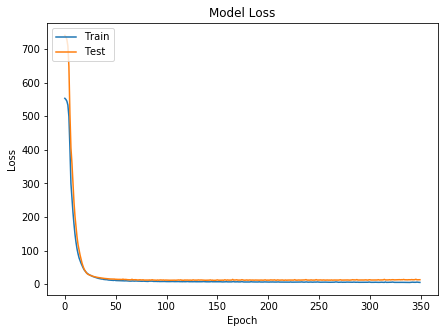

In [65]:
figure = pyplot.figure(figsize = (7,5))
axis = figure.add_subplot(111)
axis.plot(history.history['loss'])
axis.plot(history.history['val_loss'])
pyplot.title('Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
axis.legend(['Train', 'Test'], loc='upper left')
pyplot.show()

The loss graph looks pretty good.  We have a nice smooth curve the slopes downwards. and then it flattens out as the model converges.  We don't for example have a large gap between the Test and Train results, or have the Test line flatten out while the Train line continues to decrease.  (Both of these would indicate an overfitting issue.)

##### Calculate predictions

In [67]:
model.fit(xFeatures, yTrain)
preds = model.predict(xValFeatures)
mse = mean_squared_error(yVal, preds)
rmse = sqrt(mse)

In [68]:
print("MSE = ", mse)
print("RMSE = ", rmse)

MSE =  14.257438902440343
RMSE =  3.7759023957777753


In [69]:
model.get_params()

{'batch_size': 36,
 'build_fn': <function __main__.wrapper.<locals>.buildModel>,
 'epochs': 350,
 'verbose': 0}

# Final comments

I as noted above the Gradient Boosting ensemble outperforms the neural network implementation explored in this write-up.  For a real project at this point I'd likely stop working on improving the neural network and explore increasing performance with Gradient Boosting.

For reference:

|Model     |Write-up              |Prediction MSE|
|----------|------------------------|--------------|
|GB        | Model-02.Keras         | 12.24        |
|Neural Net| Model-02.Keras.1.ipynb | 11.94        |
|Neural Net| Model-02.Keras.2.ipynb | 14.26        |